<a href="https://colab.research.google.com/github/GuanRuLai/Python-Deep-Learning/blob/main/Fraud_Detection_ANN_Model_using_TomekLinks_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Import dataset

In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/人工智慧實務專題/card_transdata.csv')

## Split independent variables and dependent variable

In [ ]:
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

import HappyML.preprocessor as pp
import numpy as np

X, Y = pp.decomposition(df, x_columns=[i for i in range(7)], y_columns=[-1])
X = X.values
Y = Y.values
print(X)
print(Y)

[[57.87785658  0.31114001  1.94593998 ...  1.          0.
   0.        ]
 [10.8299427   0.1755915   1.29421881 ...  0.          0.
   0.        ]
 [ 5.09107949  0.80515259  0.42771456 ...  0.          0.
   1.        ]
 ...
 [ 2.91485699  1.47268669  0.21807549 ...  1.          0.
   1.        ]
 [ 4.25872939  0.24202337  0.47582206 ...  0.          0.
   1.        ]
 [58.10812496  0.31811012  0.38691985 ...  1.          0.
   1.        ]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


## Check if the dataset is imbalanced

Class 0.0: 912597 samples

The proportion of the category in all data: 0.912597

Class 1.0: 87403 samples

The proportion of the category in all data: 0.087403



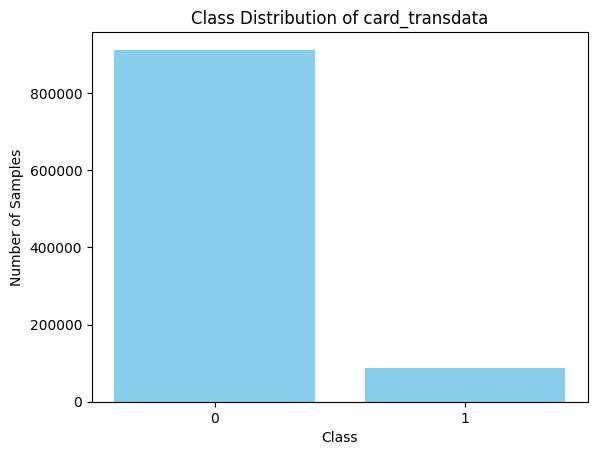

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def check_imbalance_and_plot(y):
    unique, counts = np.unique(y, return_counts=True)
    for label, count in zip(unique, counts):
        print(f"Class {label}: {count} samples\n")

        total = len(y)
        proportion = count / total
        print(f"The proportion of the category in all data: {proportion}\n")

    plt.bar(unique, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution of card_transdata')
    plt.xticks(unique)
    plt.show()

check_imbalance_and_plot(Y)

## Handle missing data

In [ ]:
print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


## Split training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[3.51985152e+00 9.89142730e-01 6.34209624e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.92236191e+01 2.68105400e-02 6.05798372e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [5.53889118e+01 9.67726856e-01 4.64450095e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [2.68070835e+01 4.40967803e+00 4.84272835e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.21443426e+01 4.08443337e-02 1.79287662e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.93375070e+01 5.25678996e-01 3.22232714e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[ 3.66060786  0.10902654  4.30416756 ...  0.          0.
   1.        ]
 [ 0.79312666  1.55401696  0.73468389 ...  0.          0.
   1.        ]
 [ 1.44662928  1.06029302  0.62118212 ...  0.          0.
   1.        ]
 ...
 [15.38429381  1.12161721  6.02938897 ...  1.          0.
   1.        ]
 [ 7.40735209 50.07064132  0.5213136  ...  1.          0.
   0.        ]
 [ 5.76515306  1.08371062  1.1

## Using TomekLinks to undersample majority data

In [ ]:
from imblearn.under_sampling import TomekLinks

X_res, Y_res = TomekLinks().fit_resample(X_train, Y_train)
print(X_res)
print(Y_res)

[[3.51985152e+00 9.89142730e-01 6.34209624e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.92236191e+01 2.68105400e-02 6.05798372e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [5.53889118e+01 9.67726856e-01 4.64450095e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [2.68070835e+01 4.40967803e+00 4.84272835e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.21443426e+01 4.08443337e-02 1.79287662e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.93375070e+01 5.25678996e-01 3.22232714e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[0. 0. 0. ... 0. 0. 0.]


## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_res = sc_X.fit_transform(X_res)
X_test = sc_X.transform(X_test)
print(X_res)
print(X_test)

[[-0.3645258  -0.15035942 -0.42930729 ...  1.36231222 -0.33413888
   0.73201743]
 [ 0.2066082  -0.18729249 -0.43965571 ...  1.36231222 -0.33413888
   0.73201743]
 [ 0.46519571 -0.15118134 -0.4911399  ... -0.73404612 -0.33413888
   0.73201743]
 ...
 [ 0.00798755 -0.01908371 -0.48391973 ... -0.73404612  2.99276751
  -1.36608769]
 [-0.22656445 -0.18675389 -0.00727857 ... -0.73404612 -0.33413888
   0.73201743]
 [ 0.36839463 -0.16814656  0.51337938 ...  1.36231222 -0.33413888
  -1.36608769]]
[[-0.36227419 -0.18413714  0.90742508 ... -0.73404612 -0.33413888
   0.73201743]
 [-0.40814375 -0.12868028 -0.3927109  ... -0.73404612 -0.33413888
   0.73201743]
 [-0.39769002 -0.14762877 -0.43405239 ... -0.73404612 -0.33413888
   0.73201743]
 ...
 [-0.17473669 -0.14527523  1.53581356 ...  1.36231222 -0.33413888
   0.73201743]
 [-0.30233954  1.73332489 -0.47042814 ...  1.36231222 -0.33413888
  -1.36608769]
 [-0.32860892 -0.14673003 -0.23341707 ... -0.73404612 -0.33413888
   0.73201743]]


# Neural network processing

## Build levels of neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 1000000/5 * (7 + 1) = 25000
model.add(Dense(input_dim=X_train.shape[1], units=25000, kernel_initializer="glorot_normal", activation="relu"))
# 10000000/5 * (25000 + 1) = 8
model.add(Dense(units=8, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="sigmoid"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25000)             200000    
                                                                 
 dense_1 (Dense)             (None, 8)                 200008    
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400017 (1.53 MB)
Trainable params: 400017 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Model compiling

In [ ]:
import tensorflow as tf

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

## Model adjustment

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Create TensorBoard log directory
import os
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard

logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Start the TensorBoard
%tensorboard --logdir logs

## Model training

In [ ]:
epochs_metrics = model.fit(X_res, Y_res, validation_split=0.2, batch_size=32, epochs=8, callbacks=[tensorboard_callback])

Epoch 1/8
19946/19946 [==============================] - 97s 5ms/step - loss: 0.0226 - recall: 0.9635 - val_loss: 0.0172 - val_recall: 0.9767
Epoch 2/8
19946/19946 [==============================] - 86s 4ms/step - loss: 0.0096 - recall: 0.9830 - val_loss: 0.0062 - val_recall: 0.9900
Epoch 3/8
19946/19946 [==============================] - 86s 4ms/step - loss: 0.0079 - recall: 0.9853 - val_loss: 0.0077 - val_recall: 0.9824
Epoch 4/8
19946/19946 [==============================] - 84s 4ms/step - loss: 0.0070 - recall: 0.9872 - val_loss: 0.0098 - val_recall: 0.9808
Epoch 5/8
19946/19946 [==============================] - 85s 4ms/step - loss: 0.0064 - recall: 0.9885 - val_loss: 0.0041 - val_recall: 0.9968
Epoch 6/8
19946/19946 [==============================] - 87s 4ms/step - loss: 0.0059 - recall: 0.9893 - val_loss: 0.0051 - val_recall: 0.9887
Epoch 7/8
19946/19946 [==============================] - 86s 4ms/step - loss: 0.0056 - recall: 0.9902 - val_loss: 0.0115 - val_recall: 0.9926
Epoch 

## Model prediction

In [ ]:
Y_pred = pd.DataFrame(np.rint(model.predict(X_test)), columns=["pred_fraud"])
Y_test = pd.DataFrame(Y_test, columns=["true_fraud"])
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

6250/6250 [==============================] - 10s 2ms/step
        true_fraud  pred_fraud
0              1.0         1.0
1              0.0         0.0
2              0.0         0.0
3              0.0         0.0
4              1.0         1.0
...            ...         ...
199995         0.0         0.0
199996         1.0         1.0
199997         1.0         1.0
199998         0.0         0.0
199999         0.0         0.0

[200000 rows x 2 columns]


## Model evaluation

### Test loss & recall

In [ ]:
test_loss, test_recall = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("Recall of Testing Set:", test_recall)

6250/6250 [==============================] - 14s 2ms/step - loss: 0.0058 - recall: 0.9950
Loss of Testing Set: 0.005801873747259378
Recall of Testing Set: 0.9949957132339478


### Making the confusion matrix

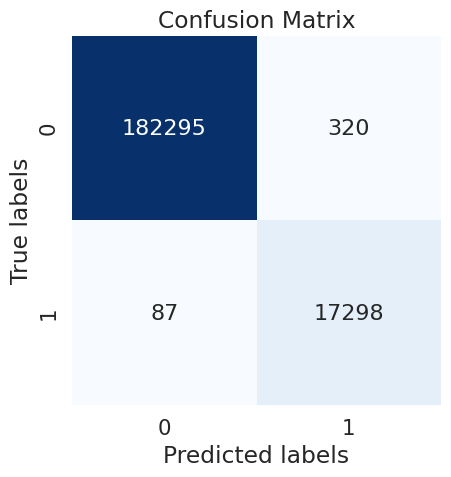

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 16}, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Making ROC curve

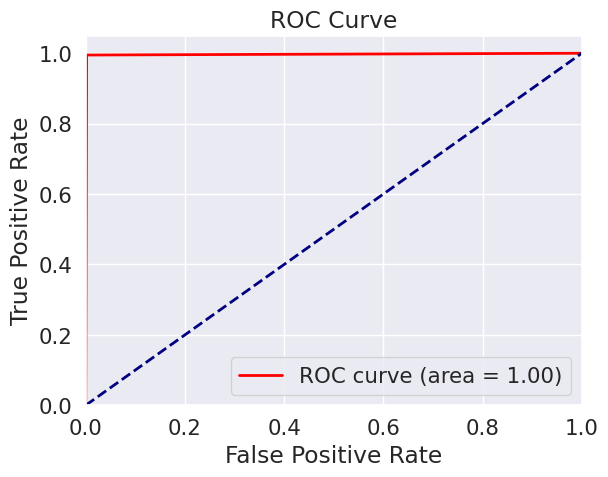

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Answer prediction

In [ ]:
test_case = model.predict(sc_X.transform([[3.803057351, 67.24108053, 1.872949614, 1, 0, 0, 1]]))

prediction = test_case[0][0]
print("The probability of the person being defrauded:", prediction)
if prediction > 0.5:
    print("The person is in high risk of being defrauded, needing to be monitored.")
else:
    print("The person is in low risk of being defrauded, don't worry.")

1/1 [==============================] - 0s 105ms/step
The probability of the person being defrauded: 0.99770206
The person is in high risk of being defrauded, needing to be monitored.
